In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Single-Frequency Tone (sampled at integer multiple)
Suppose an analog sine wave with frequency $freq$ is being sampled at sampling rate $fs$. We know that the DTFT is two spectral lines at $\pm freq$.

If $fs$ is a multiple of $freq$ such that letting frame size $N = \dfrac{fs}{freq}$ represents one cycle being sampled, then $freq$ will be detected. 

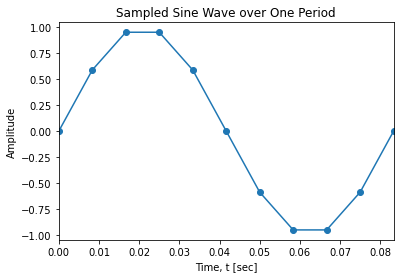

In [2]:
# SIMULATE SAMPLING A SINE WAVE

freq = 12                      # analog signal frequency = 12 Hz
fs = 120                       # sampling rate = 120 samp/sec
Ts = 1/fs                      # sampling period
n = np.arange(0,1000)          # array of (DT) indices, n
t = n*Ts                       # array of (CT) time points corresponding to n
x_t = np.sin(2*np.pi*freq*t)   # analog signal sampled at fs

# PLOT SAMPLED WAVE OVER ONE PERIOD

plt.plot(t,x_t, marker='o')
plt.xlim([0,1/freq])
plt.title('Sampled Sine Wave over One Period')
plt.xlabel('Time, t [sec]')
plt.ylabel('Amplitude')
plt.show()

### Window One Cycle of Sampled Wave

First, we compute the DFT by using the matrix form $X = Wx$.  Directly evaluating the equation gives a time complexity of $O(N^2)$.

In the plot below, the blue curve depicts the magnitude spectrum of the windowed sine wave that was sampled, whereas the red vertical line represents the frequency $freq$ of the sine wave.

DFT elapsed time: 0.000470 seconds


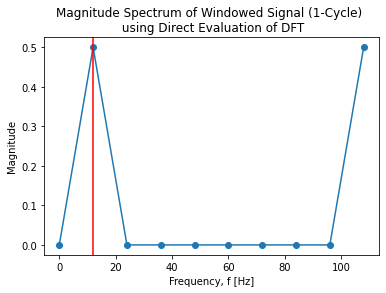

Peak frequency: 12.000 [Hz]


In [3]:
# WINDOW ONE PERIOD OF SAMPLED WAVE

t_cycle = t[t < 1/freq]                     # time points corresponding to one period of sampled wave
x_t_cycle = x_t[:len(t_cycle)]              # one period of sampled wave
w = np.ones_like(t_cycle)                   # rectangular window, w
N = len(t_cycle)                            # frame size N

# COMPUTE N-POINT DFT

f = np.arange(0, N) * fs / N                # array of CT frequencies, f

t0 = time.time()
kn = np.array([[(k*n) \
        for k in np.arange(0,N)] \
            for n in np.arange(0,N)])
W_twiddle = np.exp(-1j * 2*np.pi * kn / N)  # matrix of twiddle factors
X_f = W_twiddle @ (x_t_cycle * w)           # N-point DFT of windowed signal

dft_elapsed = time.time()-t0
print(f"DFT elapsed time: {dft_elapsed:.6f} seconds")

rect_normz = 1 / len(t_cycle)               # normalization factor for spectrum of rect-windowed signal

plt.plot(f, abs(X_f) * rect_normz, marker='o')
plt.title('Magnitude Spectrum of Windowed Signal (1-Cycle) \n using Direct Evaluation of DFT')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f[np.argmax(abs(X_f))]):.3f} [Hz]")

Notice that since $fs$ is a multiple of $freq$ and one cycle is being sampled, we can pick up $freq$ precisely.

Now, we introduce the Fast Fourier Transform (FFT), which is designed to compute the DFT in less time. For most cases, the time complexity is $O(N\log_2 N)$.

FFT elapsed time: 0.000221 seconds


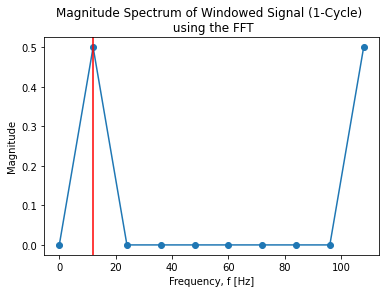

Peak frequency: 12.000 [Hz]


In [4]:
# WINDOW ONE PERIOD OF SAMPLED WAVE

t_cycle = t[t < 1/freq]                # time points corresponding to one period of sampled wave
x_t_cycle = x_t[:len(t_cycle)]         # one period of sampled wave
w = np.ones_like(t_cycle)              # rectangular window, w
N = len(t_cycle)                       # frame size N

# COMPUTE N-POINT DFT 

f = np.arange(0, N) * fs / N           # array of CT frequencies, f
t0 = time.time()
X_f = np.fft.fft(x_t_cycle * w, N)     # N-point DFT of windowed signal using FFT

fft_elapsed = time.time()-t0
print(f"FFT elapsed time: {fft_elapsed:.6f} seconds")
rect_normz = 1 / len(t_cycle)          # normalization factor for spectrum of rect-windowed signal

# PLOT MAGNITUDE SPECTRUM

plt.plot(f, abs(X_f) * rect_normz, marker='o')
plt.title('Magnitude Spectrum of Windowed Signal (1-Cycle) \n using the FFT')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f[np.argmax(abs(X_f))]):.3f} [Hz]")

Here, we get the same answer as the direct evaluation of the DFT, but in less time. One can see that $\dfrac{O(N^2)}{O(N\log_2 N)}\approx O\left(\dfrac{N}{\log_2 N}\right)$.

For $N=10$, it follows that $\dfrac{N}{\log_2 N} = \dfrac{10}{\log_2 10} \approx 3.01$.

In [5]:
print(f"Ratio of DFT-to-FFT elapsed times: {dft_elapsed / fft_elapsed:.6f}")

Ratio of DFT-to-FFT elapsed times: 2.123922


One can see that as $N$ increases, it becomes more ideal to use FFT rather than direct evaluation. For the rest of the text, we'll use the FFT to compute the DFT of a sequence.

Now we want to circularly shift half of the spectrum such that we obtain the baseband spectrum symmetric about the vertical axis.

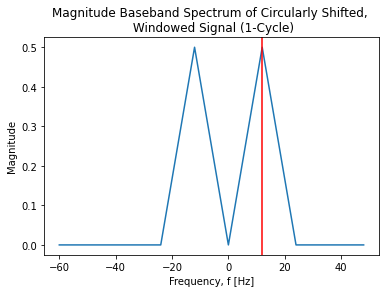

Peak frequency: 12.000 [Hz]


In [6]:
# CIRCULARLY SHIFT TO GET SYMMETRIC MAGNITUDE SPECTRUM

if N % 2 == 0:
    f_shift = np.arange(-N/2, N/2) * fs / N
    X_f_shift = np.hstack((X_f[int(N/2):], X_f[:int(N/2)]))
else:
    f_shift = np.linspace(-(N-1)/2, (N-1)/2, N) * fs / N
    X_f_shift = np.hstack((X_f[int((N+1)/2):], X_f[:int((N+1)/2)]))
    
plt.plot(f_shift, abs(X_f_shift) * rect_normz)
plt.title('Magnitude Baseband Spectrum of Circularly Shifted, \n Windowed Signal (1-Cycle)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_shift[np.argmax(abs(X_f_shift))]):.3f} [Hz]")

The numpy package in Python has built-in functions <b>fftshift</b> and <b>fftfreq</b> that will take care of the circular shifting.

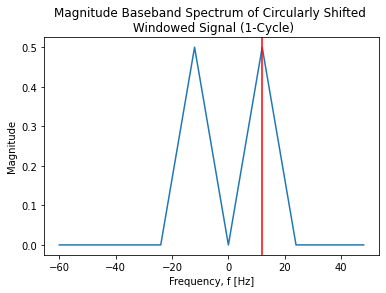

Peak frequency: 12.000 [Hz]


In [7]:
f_shift = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))
X_f_shift = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))

plt.plot(f_shift, abs(X_f_shift) * rect_normz)
plt.title('Magnitude Baseband Spectrum of Circularly Shifted \n Windowed Signal (1-Cycle)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_shift[np.argmax(abs(X_f_shift))]):.3f} [Hz]")

### Window Non-Integer Cycles of Sampled Wave

If a non-integer number of cycles is windowed, then $freq$ cannot be precisely detected.

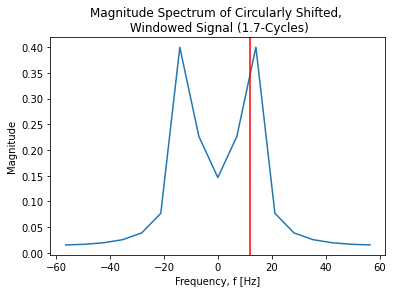

Peak frequency: 14.118 [Hz]


In [8]:
# WINDOW NON-INTEGER PERIOD OF SAMPLED WAVE

t_cycle = t[t < 1.7/freq]              # time points corresponding to 1.7 periods of sampled wave
x_t_cycle = x_t[:len(t_cycle)]         # one period of sampled wave
w = np.ones_like(t_cycle)              # rectangular window, w
N = len(t_cycle)                       # frame size N

# CIRCULARLY SHIFT TO GET SYMMETRIC MAGNITUDE SPECTRUM

f_shift = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))
X_f_shift = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))
rect_normz = 1 / len(t_cycle)          

plt.plot(f_shift, abs(X_f_shift) * rect_normz)
plt.title('Magnitude Spectrum of Circularly Shifted, \n Windowed Signal (1.7-Cycles)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_shift[np.argmax(abs(X_f_shift))]):.3f} [Hz]")

To remedy that as best as we can, increase the frame size $N$ by zero-padding. In doing so, we also begin to smooth out the spectrum. Here, we can see the DTFT of a sine wave being convolved with the Dirichlet kernel, the effect of windowing a signal.

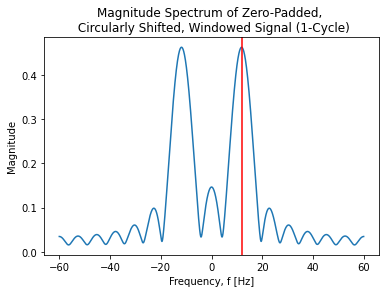

Peak frequency: 11.836 [Hz]


In [9]:
# APPLY ZERO PADDING

N = 2048

f_pad = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))
X_f_pad = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))

plt.plot(f_pad, abs(X_f_pad) * rect_normz)
plt.title('Magnitude Spectrum of Zero-Padded, \n Circularly Shifted, Windowed Signal (1-Cycle)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_pad[np.argmax(abs(X_f_pad))]):.3f} [Hz]")

# Single-Frequency Tone (sampled at non-integer multiples)
Suppose one cycle is collected, but $fs$ is not a multiple of $freq$. Then $freq$ cannot be detected.

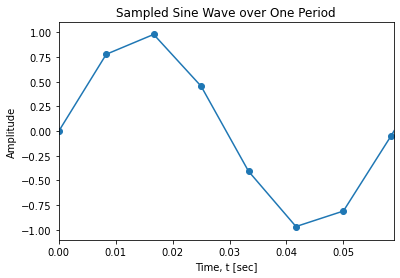

In [10]:
# SIMULATE SAMPLING A SINE WAVE

freq = 17                      # analog signal frequency = 17 Hz
fs = 120                       # sampling rate = 120 samp/sec
Ts = 1/fs                      # sampling period
n = np.arange(0,1000)          # array of (DT) indices, n
t = n*Ts                       # array of (CT) time points corresponding to n
x_t = np.sin(2*np.pi*freq*t)   # analog signal sampled at fs

# PLOT SAMPLED WAVE OVER ONE PERIOD

plt.plot(t,x_t, marker='o')
plt.xlim([0,1/freq])
plt.title('Sampled Sine Wave over One Period')
plt.xlabel('Time, t [sec]')
plt.ylabel('Amplitude')
plt.show()

### Window One Cycle of Sampled Wave

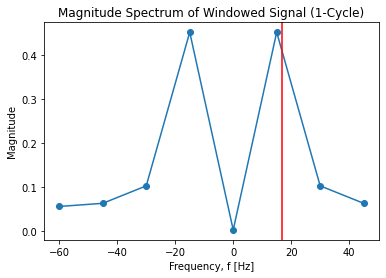

Peak frequency: 15.000 [Hz]


In [11]:
# WINDOW ONE PERIOD OF SAMPLED WAVE

t_cycle = t[t < 1/freq]                # time points corresponding to one period of sampled wave
x_t_cycle = x_t[:len(t_cycle)]         # one period of sampled wave
w = np.ones_like(t_cycle)              # rectangular window, w
N = len(t_cycle)                       # frame size N

# COMPUTE N-POINT DFT 

f = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))   
X_f = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))    
rect_normz = 1 / len(t_cycle)          

# PLOT MAGNITUDE SPECTRUM

plt.plot(f, abs(X_f) * rect_normz, marker='o')
plt.title('Magnitude Spectrum of Windowed Signal (1-Cycle)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f[np.argmax(abs(X_f))]):.3f} [Hz]")

### Window Non-Integer Cycles of Sampled Wave

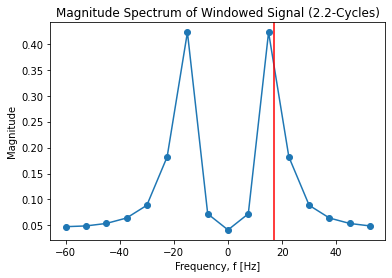

Peak frequency: 15.000 [Hz]


In [12]:
# INCREASE NUMBER OF CYCLES

t_cycle = t[t < 2.2/freq]              # time points corresponding to 2.2 periods of sampled wave
x_t_cycle = x_t[:len(t_cycle)]         # one period of sampled wave
w = np.ones_like(t_cycle)              # rectangular window, w
N = len(t_cycle)                       # frame size N

# COMPUTE N-POINT DFT 
                      
f = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))
X_f = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))  
rect_normz = 1 / len(t_cycle)          

# PLOT MAGNITUDE SPECTRUM

plt.plot(f, abs(X_f) * rect_normz, marker='o')
plt.title('Magnitude Spectrum of Windowed Signal (2.2-Cycles)')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f[np.argmax(abs(X_f))]):.3f} [Hz]")

We can get a more accurate spectrum for a more accurate peak detection by zero-padding. In numpy, this is done by specifying a different $N$ in <b>fft</b>, larger than the length of the windowed sequence.

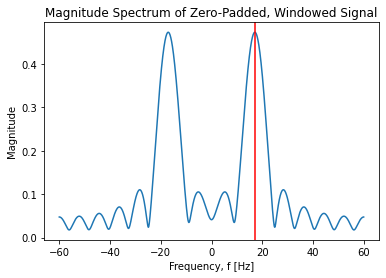

Peak frequency: 17.051 [Hz]


In [13]:
# APPLY ZERO PADDING

N = 2048

f_pad = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))
X_f_pad = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))
rect_normz = 1 / len(t_cycle)          

plt.plot(f_pad, abs(X_f_pad) * rect_normz)
plt.title('Magnitude Spectrum of Zero-Padded, Windowed Signal')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_pad[np.argmax(abs(X_f_pad))]):.3f} [Hz]")

### Using a Non-Rectangular Window

Different windows have different effects on mainlobe width and sidelobe roll-off. Here, we use one of the most common non-rectangular windows: the Hann window. The window is applied first before zero-padding.

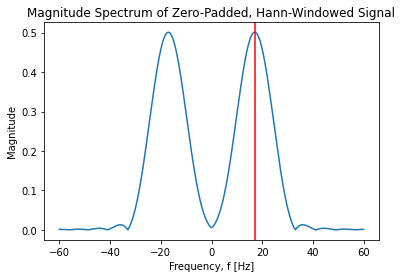

Peak frequency: 17.051 [Hz]


In [14]:
# APPLY HANNING, then ZERO PAD

w = np.hanning(len(t_cycle))

N = 2048

f_pad = np.fft.fftshift(np.fft.fftfreq(N, d=Ts))   
X_f_pad = np.fft.fftshift(np.fft.fft(x_t_cycle * w, N))
hann_normz = 1 / ((len(t_cycle) - 1) / 2) # normalization factor for spectrum of Hann-windowed signal

plt.plot(f_pad, abs(X_f_pad) * hann_normz)
plt.title('Magnitude Spectrum of Zero-Padded, Hann-Windowed Signal')
plt.xlabel('Frequency, f [Hz]')
plt.ylabel('Magnitude')
plt.axvline(x=freq, color='r')
plt.show()

# PRINT FREQ WHERE PEAK
print(f"Peak frequency: {abs(f_pad[np.argmax(abs(X_f_pad))]):.3f} [Hz]")